In [2]:
%matplotlib inline

In [ ]:
# This notebook samples the Digital Elevation Model (IslandsDEM 20x20m) at gauge locations and inserts elevations as a 
# column in the gauge shapefile

In [47]:
import geopandas
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import Point
import fiona
from shapely.geometry import box, mapping, Polygon
from rasterio.plot import show

In [37]:
# Read gauges file
combined_gauges_path = '../gauge_shapefiles/gauges_combined_update2/gauges_combined.shp'
combined_gauges = gpd.read_file(combined_gauges_path)
combined_gauges = combined_gauges.set_index('obj_id')
gdf = combined_gauges

In [38]:
# DEM (grid) is full iceland in the coordinate projection ISN93
dem_path = '../data/dem/IslandsDEMv1.0_20x20m_isn93_zmasl.tif'
src = rasterio.open(dem_path)

# Visualize DEM and gauge locations

<AxesSubplot:>

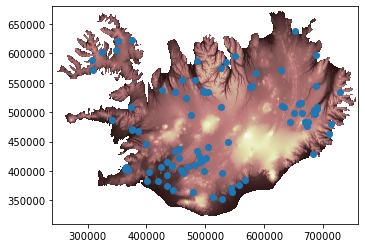

In [40]:
fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent=[src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rasterio.plot.show(src, extent=extent, ax=ax, cmap='pink')

gdf.plot(ax=ax)

# Sample DEM at gauge locations

In [41]:
coord_list = [(x,y) for x,y in zip(gdf['geometry'].x , gdf['geometry'].y)]

gdf['elevation'] = [x for x in src.sample(coord_list)] #[0]
gdf.head()

,gid,st_numer,st_nafn,vhm_numer,vatnsfall,flokkur,tegund,gagnaeigan,vod_svaedi,vod_nafn,stada,upphaf_rek,dags_aflag,x,y,f16,geometry,elevation
obj_id,,,,,,,,,,,,,,,,,,
13.0,3.0,V12,útfall Haukadalsvatns,12.0,Haukadalsá,"Svæðisstöð (Tímaröð >20 ár, án miðlunar, ekki ...","Rennslisstöð, einn mælir",Veðurstofa Íslands,542.0,Mið-Dalir,Í Rekstri,19391013,None,374160.0,508235.0,None,POINT (374160.000 508235.000),[35.22451]
38.0,7.0,V449,Sjóarfoss,19.0,Dynjandisá,"Svæðisstöð (Tímaröð >20 ár, án miðlunar, ekki ...","Rennslisstöð, einn mælir",Veðurstofa Íslands,572.0,Mjólká - Dynjandi,Í Rekstri,20001101,None,307220.0,588483.0,None,POINT (307220.000 588483.000),[18.738697]
58.0,8.0,V316,Flögubrú II,26.0,Sandá,"Svæðisstöð (Tímaröð >20 ár, án miðlunar, ekki ...","Rennslisstöð, einn mælir",Veðurstofa Íslands,723.0,Sandá og Hölkná,Í Rekstri,19651108,None,653281.0,637714.0,None,POINT (653281.000 637714.000),[21.196878]
63.0,9.0,V320,Þjórsártún,30.0,Þjórsá,"Vatnsbúskaparstöð (Vatnasvið >500 km2, tímaröð...","Rennslisstöð, einn mælir",Landsvirkjun,842.0,Urriðafoss,Í Rekstri,19540808,None,419988.0,382151.0,None,POINT (419988.000 382151.000),[43.18806]
76.0,11.0,V38,Nauteyri,38.0,Þverá,"Svæðisstöð (Tímaröð >20 ár, án miðlunar, ekki ...","Rennslisstöð, einn mælir",Veðurstofa Íslands,582.0,Þverá á Langadalsströnd,Í Rekstri,19471231,None,348410.0,605213.0,None,POINT (348410.000 605213.000),[21.906448]


# Update the shapefile (add elevation)

In [42]:
for idx in gdf.index:
    gdf['elevation'].loc[idx] = float(gdf['elevation'].loc[idx])

/data/helgason/anaconda3/envs/gda22_env/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [55]:
gdf['elevation'] = gdf['elevation'].astype('int64')

# Save gauges shapefile with elevation:

In [56]:
gdf.to_file('/data/helgason/lamah-ice/gauge_shapefiles/watersheds/combined_gauges_20m_v3/joined/combined_joined_with_elevation.shp')